In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\vruxa\\Plant_based_project\\D_S\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33620 files belonging to 9 classes.


In [3]:
# !nvidia-smi

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\vruxa\\Plant_based_project\\D_S\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8404 files belonging to 9 classes.


In [5]:
classes = training_set.class_names
print(classes)

['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy', 'Tomato__Bacterial_spot', 'Tomato__Early_blight', 'Tomato__Late_blight', 'Tomato__Leaf_Mold', 'Tomato__Target_Spot', 'Tomato__healthy']


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same',activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1051/1051 [==============================] - 248s 236ms/step - loss: 0.8381 - accuracy: 0.7117 - val_loss: 0.2769 - val_accuracy: 0.9067
Epoch 2/10
1051/1051 [==============================] - 270s 257ms/step - loss: 0.2938 - accuracy: 0.9036 - val_loss: 0.1807 - val_accuracy: 0.9436
Epoch 3/10
1051/1051 [==============================] - 276s 262ms/step - loss: 0.1775 - accuracy: 0.9431 - val_loss: 0.1272 - val_accuracy: 0.9576
Epoch 4/10
1051/1051 [==============================] - 266s 252ms/step - loss: 0.1138 - accuracy: 0.9634 - val_loss: 0.1321 - val_accuracy: 0.9553
Epoch 5/10
1051/1051 [==============================] - 236s 224ms/step - loss: 0.0910 - accuracy: 0.9706 - val_loss: 0.1744 - val_accuracy: 0.9472
Epoch 6/10
1051/1051 [==============================] - 229s 218ms/step - loss: 0.0738 - accuracy: 0.9764 - val_loss: 0.1183 - val_accuracy: 0.9645
Epoch 7/10
1051/1051 [==============================] - 232s 220ms/step - loss: 0.0576 - accuracy: 0.9817 - val_

## Model Evaluation

In [21]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1051/1051 [==============================] - 116s 110ms/step - loss: 0.0056 - accuracy: 0.9983
Training accuracy: 0.9982748627662659


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

263/263 [==============================] - 14s 53ms/step - loss: 0.0995 - accuracy: 0.9722
Validation accuracy: 0.9721561074256897


## Save Model

In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'loss': [1.0910612344741821,
  0.35773351788520813,
  0.20314256846904755,
  0.14098531007766724,
  0.09483452141284943,
  0.08139266818761826,
  0.05955806374549866,
  0.05336357653141022,
  0.04216577857732773,
  0.04001852497458458,
  0.038761481642723083,
  0.0333644337952137,
  0.024981725960969925,
  0.029700342565774918,
  0.023856760933995247,
  0.02728170156478882,
  0.023160187527537346,
  0.019409799948334694,
  0.026373742148280144,
  0.01744472049176693],
 'accuracy': [0.6146044135093689,
  0.8831945061683655,
  0.9336704611778259,
  0.9546400904655457,
  0.9707019925117493,
  0.9733789563179016,
  0.9809339642524719,
  0.9838786721229553,
  0.9866151213645935,
  0.9880130887031555,
  0.9884592294692993,
  0.9900357127189636,
  0.9921177625656128,
  0.990630567073822,
  0.9924449920654297,
  0.9930398464202881,
  0.9936347603797913,
  0.9939916729927063,
  0.9930101037025452,
  0.9949732422828674],
 'val_loss': [0.44122210144996643,
  0.19381704926490784,
  0.176016449928

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

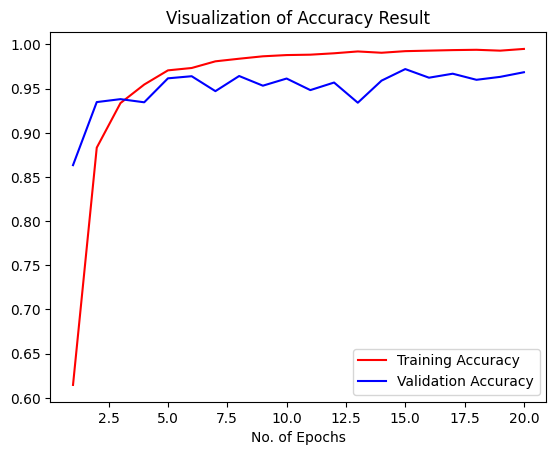

In [27]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [28]:
class_name = validation_set.class_names


In [29]:

test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\vruxa\\Plant_based_project\\D_S\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8404 files belonging to 9 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

8404/8404 [==============================] - 109s 13ms/step


In [31]:

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:

Y_true

<tf.Tensor: shape=(8404,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(8404,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                        precision    recall  f1-score   support

  Potato__Early_blight       0.99      0.99      0.99       970
   Potato__Late_blight       0.94      0.97      0.96       970
       Potato__healthy       0.99      0.99      0.99       912
Tomato__Bacterial_spot       0.97      0.99      0.98       850
  Tomato__Early_blight       0.95      0.94      0.95       960
   Tomato__Late_blight       0.94      0.91      0.93       926
     Tomato__Leaf_Mold       1.00      0.99      0.99       940
   Tomato__Target_Spot       0.98      0.98      0.98       914
       Tomato__healthy       0.99      1.00      0.99       962

              accuracy                           0.97      8404
             macro avg       0.97      0.97      0.97      8404
          weighted avg       0.97      0.97      0.97      8404



## Confusion Matrix

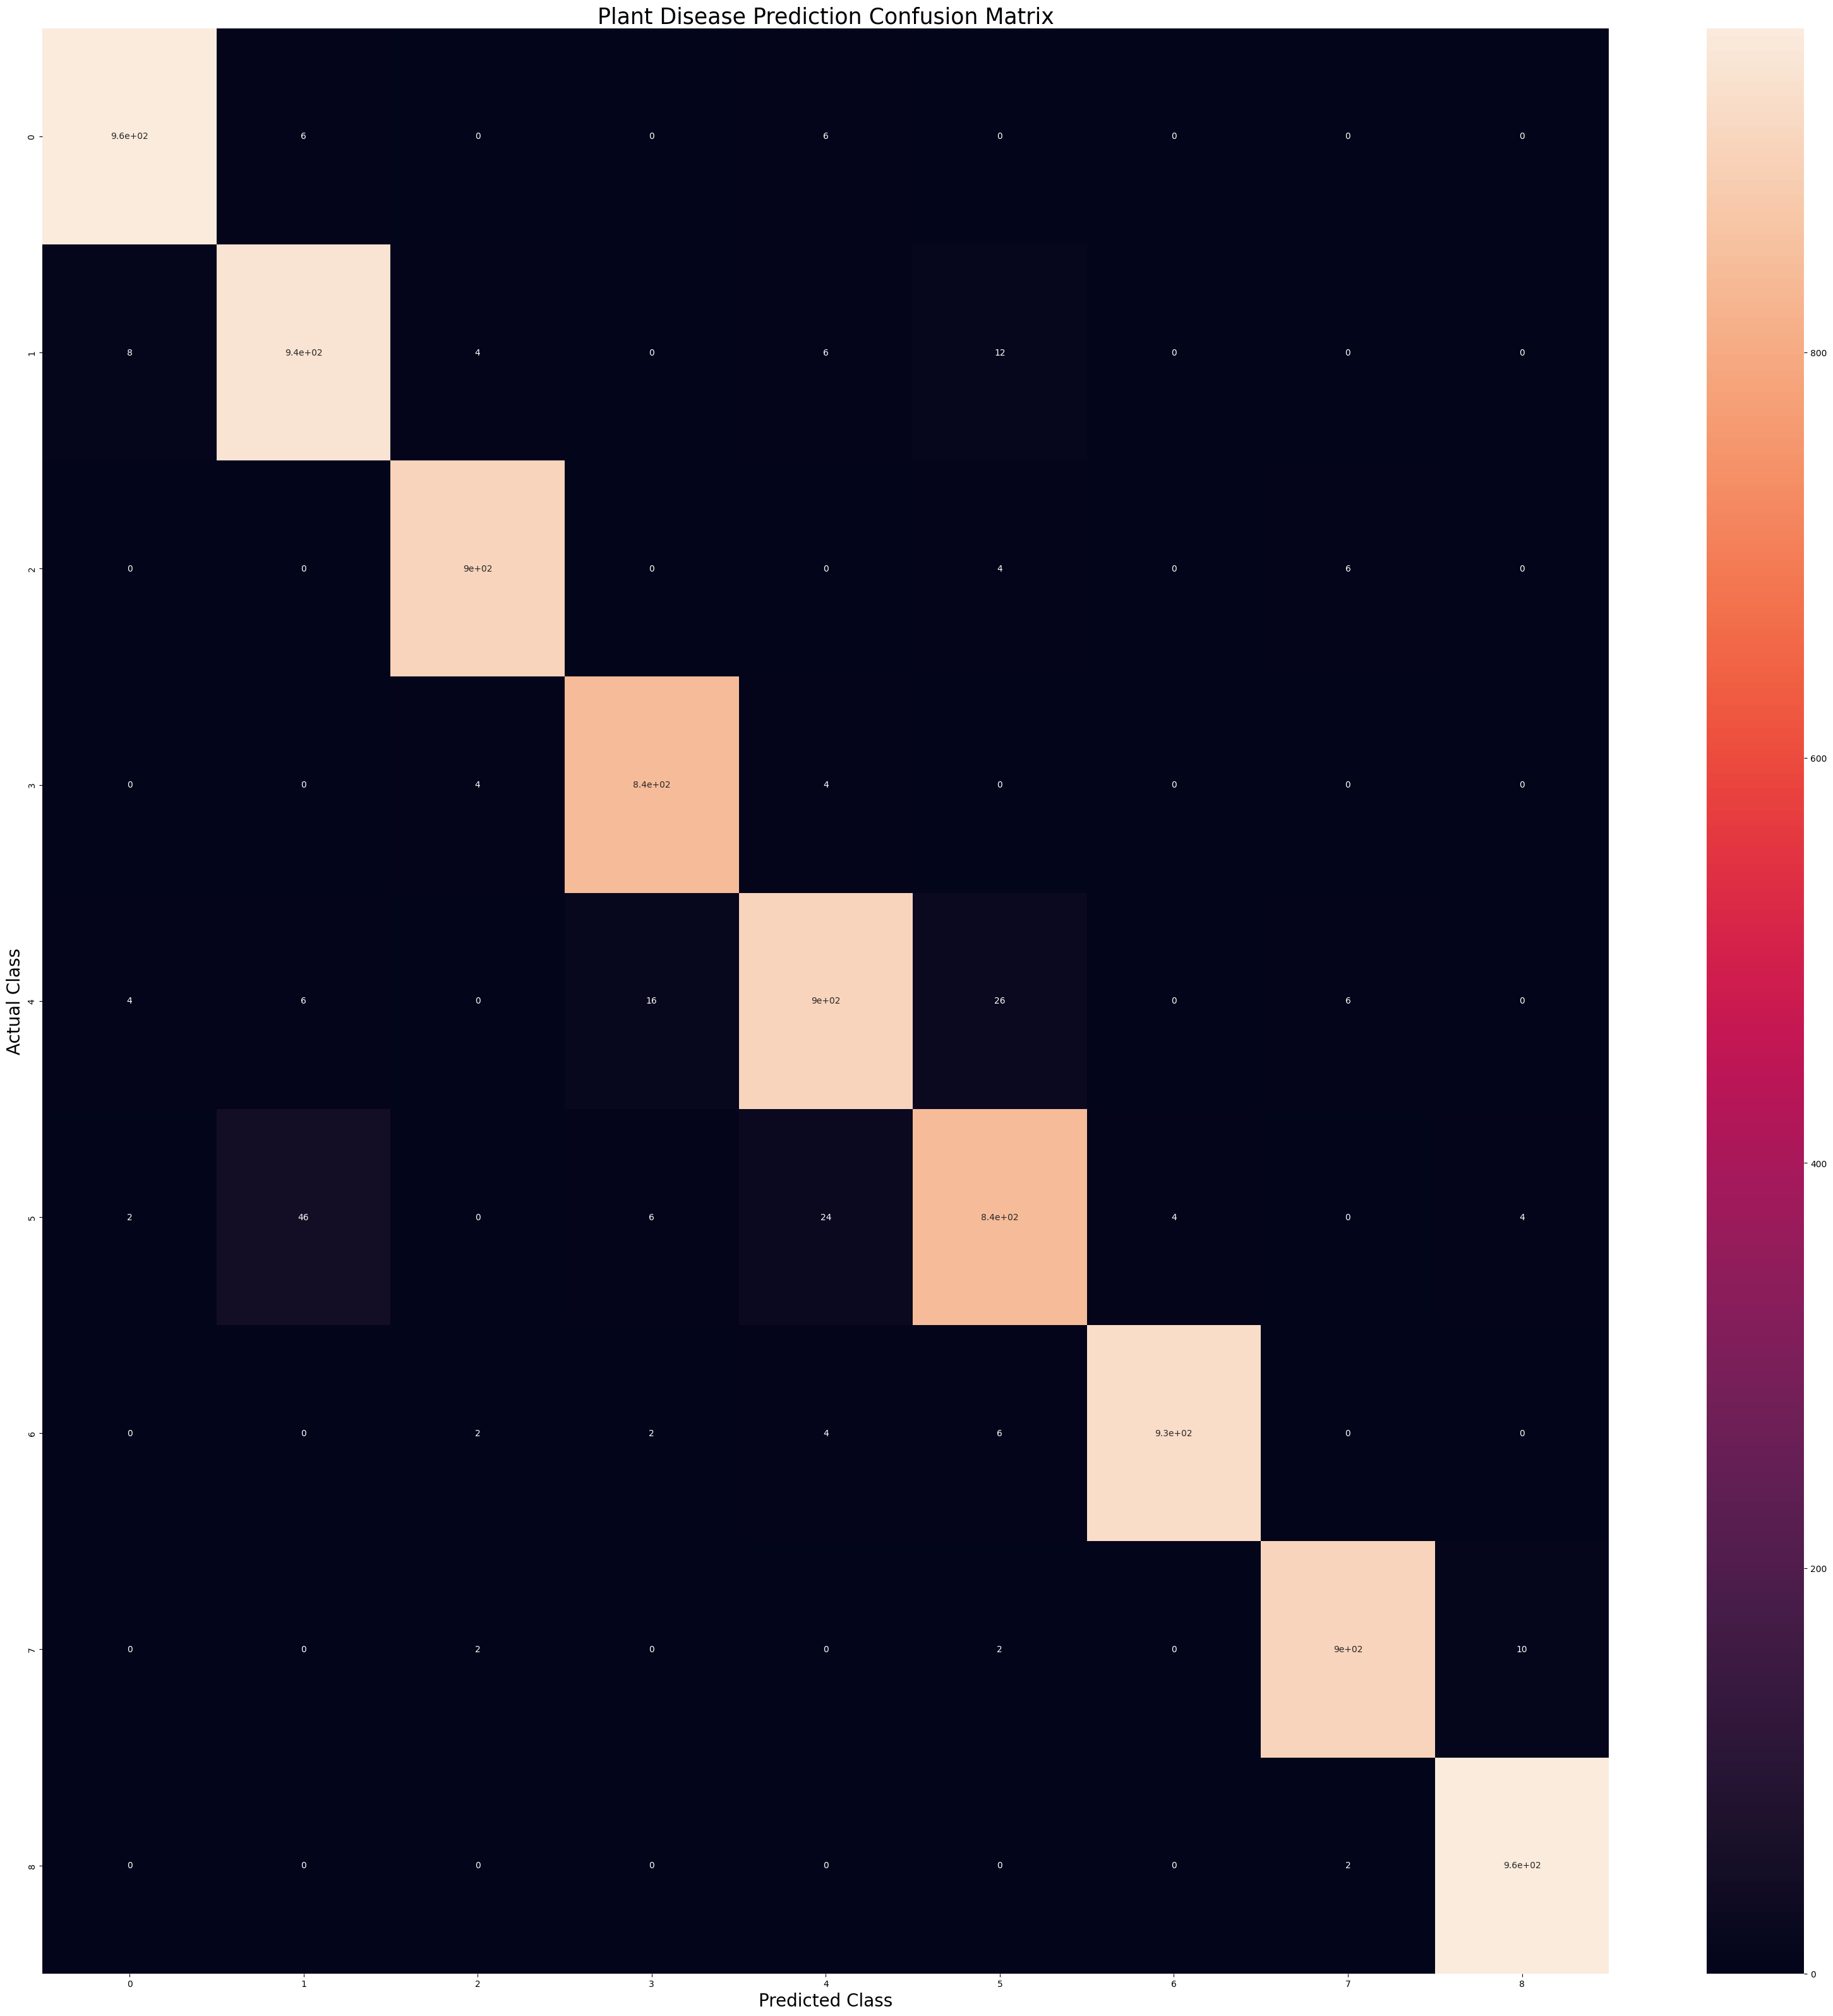

In [36]:

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()